# Algoritma K-Nearest Neighbor

Anggota **Kelompok 4**:


1.   Wahyu Dwi Prasetio / G1A019010
2.   Yahya Masykur Nurhamdi / G1A019011
3.   Martin Mulyosyahidin / G1A019061
4.   Muhammad Wijaya Permana / G1A019062


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data Mining')

import numpy             as np
import pandas            as pd
import seaborn           as sns

import matplotlib.pyplot as plt

from sklearn.neighbors    import KNeighborsClassifier

from sklearn.metrics         import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split


## Data Understanding

Dataset yang digunakan adalah `Heart Attack Analysis & Prediction Dataset` yang diperoleh melalui [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). Dataset ini terdiri atas `14 kolom` dengan rincian:
* `Age` : umur pasien
* `Sex` : jenis kelamin pasien
* `exang`: *angina* terinduksi olahraga (1 = yes; 0 = no)
* `ca`: jumlah *major vessels* (0-3)
* `cp` : Jenis nyeri dada
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
* `trtbps` : tekanan darah istirahat (dalam mmHg)
* `chol` : kolesterol dalam mg/dl diambil melalui sensor BMI
* `fbs` : (gula darah puasa > 120 mg/dl) (1 = true; 0 = false)
* `rest_ecg` : hasil elektrokardiografi istirahat
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* `thalach` : detak jantung maksimum
* `target` : 
  - 0= lebih kecil kemungkinan serangan jantung 
  - 1= lebih besar kemungkinan serangan jantung
* `oldpeak` : Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
* `slope` : kemiringan dari segmen ST _peak exercise_  
  - 0: downsloping; 
  - 1: flat; 
  - 2: upsloping
* `thal` : Kelainan darah yang disebut thalassemia
  - 0: fixed defect (no blood flow in some part of the heart)
  - 1: normal blood flow
  - 2: reversible defect (a blood flow is observed but it is not normal)


In [ ]:
# Muat dataset
df = pd.read_csv('heart.csv')

In [ ]:
# Lihat isi data yang akan diprediksi
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df[df['output']==0].iloc[0].tolist()

[67.0, 1.0, 0.0, 160.0, 286.0, 0.0, 0.0, 108.0, 1.0, 1.5, 1.0, 3.0, 2.0, 0.0]

In [ ]:
# Cek ukuran data
print('Jumlah Baris: {}'.format(df.shape[0]))
print('Jumlah Kolom: {}'.format(df.shape[1]))

Jumlah Baris: 303
Jumlah Kolom: 14


In [ ]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleansing

Berdasarkan informasi sebelumnya, terlihat tidak ada record yang bernilai null. Dengan demikian, tidak perlu dilakukan proses penanganan data null (_imputation_) pada data. Rincian data unik yang terdapat pada dataset terlihat pada sel di bawah ini.

In [ ]:
# Cek nilai unik pada data
print(f"{'Column':<29}  {'Null':>5}  {'Unique':>5}  {'Data Details':>5}")
for column in df.columns:
  print(f"Col {column:<25}: {df[column].isna().sum():>5} {len(df[column].unique()):>5}", end='')
  print(f"{'':>3}", df[column].unique())

Column                          Null  Unique  Data Details
Col age                      :     0    41    [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
Col sex                      :     0     2    [1 0]
Col cp                       :     0     4    [3 2 1 0]
Col trtbps                   :     0    49    [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Col chol                     :     0   152    [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268

## Exploratory Data Analysis

In [ ]:
# Lihat data sebagaimana maknanya
desc_df = df.copy()

desc_df['sex'] = desc_df['sex'].map({0:'Male', 1:'Female'})
desc_df['exng'] = desc_df['exng'].map({0:'False', 1:'True'})
desc_df['cp'] = desc_df['cp'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})
desc_df['fbs'] = desc_df['fbs'].map({0:'Normal', 1:'ST-T Wave Abnormality', 2:'Left Ventricular Hipertropi'})
desc_df['restecg'] = desc_df['restecg'].map({0:'Fixed Defect', 1:'Normal', 2:'Reversible Defect'})
desc_df['slp'] = desc_df['slp'].map({0:'Downsloping', 1:'Flat', 2:'Upsloping'})
desc_df['thall'] = desc_df['thall'].map({0:'False', 1:'True'})
desc_df['output'] = desc_df['output'].map({0:'Less Chance', 1:'More Chance'})

desc_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Female,asymptomatic,145,233,ST-T Wave Abnormality,Fixed Defect,150,False,2.3,Downsloping,0,True,More Chance
1,37,Female,non-anginal pain,130,250,Normal,Normal,187,False,3.5,Downsloping,0,NaN,More Chance
2,41,Male,atypical angina,130,204,Normal,Fixed Defect,172,False,1.4,Upsloping,0,NaN,More Chance
3,56,Female,atypical angina,120,236,Normal,Normal,178,False,0.8,Upsloping,0,NaN,More Chance
4,57,Male,typical angina,120,354,Normal,Normal,163,True,0.6,Upsloping,0,NaN,More Chance


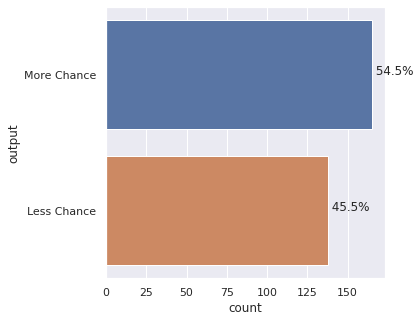

In [ ]:
# Plot kolom target
ax = sns.countplot(y='output', data=desc_df);

total = desc_df['output'].size
for p in ax.patches:
  percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x, y))


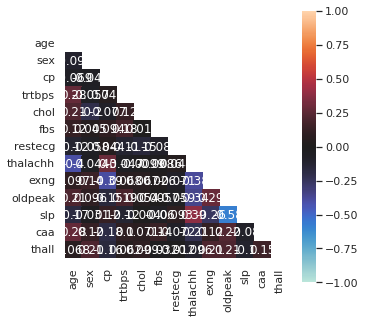

In [ ]:
# Plot korelasi antarkolom
corr = df.drop(['output'], axis=1).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True)
  sns.set(rc={'figure.figsize':(12.0,12.0)})

Pada grafik diatas, tidak terlihat adanya multikolinearitas (satu atribut berkolerasi sangat kuat dengan atribut yang lain), sehingga tidak perlu dilakukan pemangkasan fitur pada dataframe.

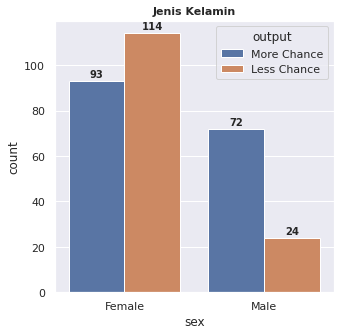

In [ ]:
sns.set(rc={'figure.figsize':(5.0,5.0)})
ax = sns.countplot(x=desc_df["sex"], hue=desc_df['output'])

plt.setp(ax.get_xticklabels(), rotation=0)
ax.set_title('Jenis Kelamin', fontsize=11, fontdict={"fontweight": "bold"})

for p in ax.patches:
    text = str(int(p.get_height()))
    ax.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+3),
                ha="center", va='center', fontsize=10, fontweight="bold")

Persentase Serangan Jantung berdasarkan Gender

In [ ]:
rate_pr = round(93/207*100,2)
rate_lk = round(72/96*100,2)
print(f'Persentase serangan jantung pada Perempuan: {rate_pr}%')
print(f'Persentase serangan jantung pada Laki-laki: {rate_lk}%')

Persentase serangan jantung pada Perempuan: 44.93%
Persentase serangan jantung pada Laki-laki: 75.0%


Visualisasi Data yang Bersifat Kategorik

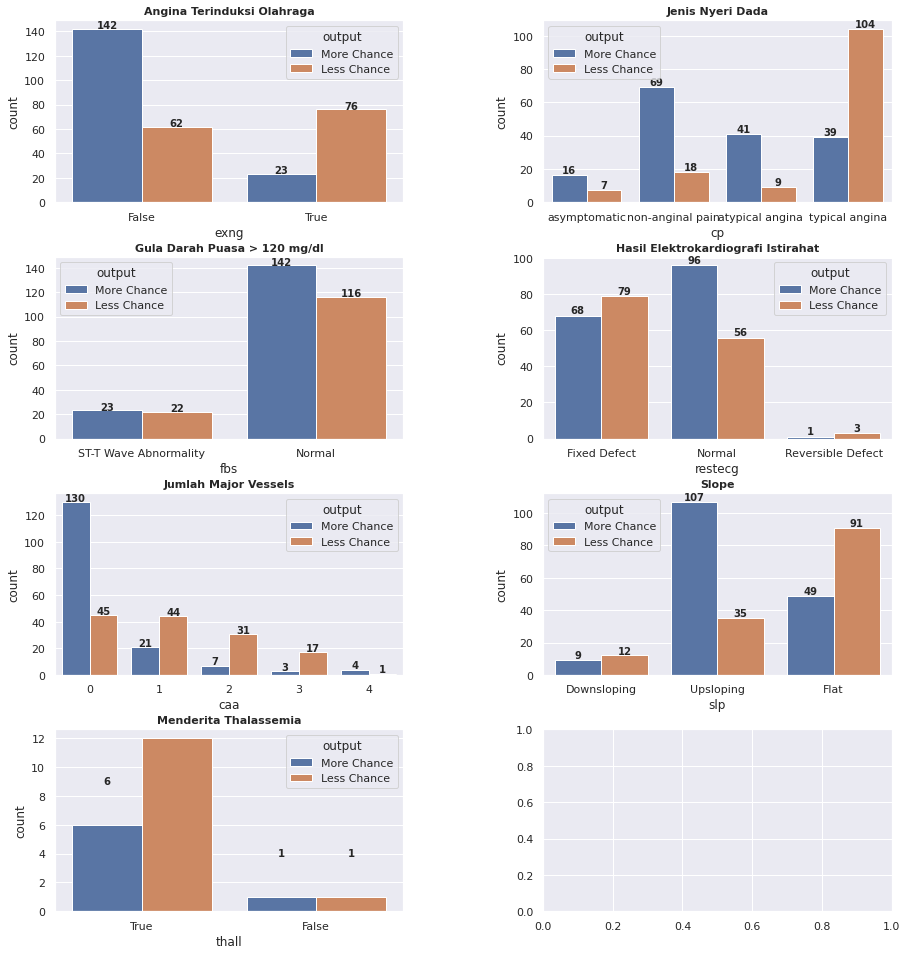

In [ ]:
def graph(name, u, title):
    sns.countplot(x=desc_df[name], hue=desc_df['output'], ax=u)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.set_title(title, fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+3),
                   ha="center", va='center', fontsize=10, fontweight="bold")

fig2, ax2 = plt.subplots(4,2, figsize=(15, 15), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph("exng", ax2[0,0], 'Angina Terinduksi Olahraga')
graph("cp", ax2[0,1], 'Jenis Nyeri Dada')
graph("fbs", ax2[1,0], 'Gula Darah Puasa > 120 mg/dl')
graph('restecg', ax2[1,1], 'Hasil Elektrokardiografi Istirahat')
graph('caa', ax2[2,0], 'Jumlah Major Vessels')
graph('slp', ax2[2,1], 'Slope')
graph('thall', ax2[3,0], 'Menderita Thalassemia')

plt.rcParams['axes.axisbelow'] = True

Visualisasi Data yang Bersifat Numerik

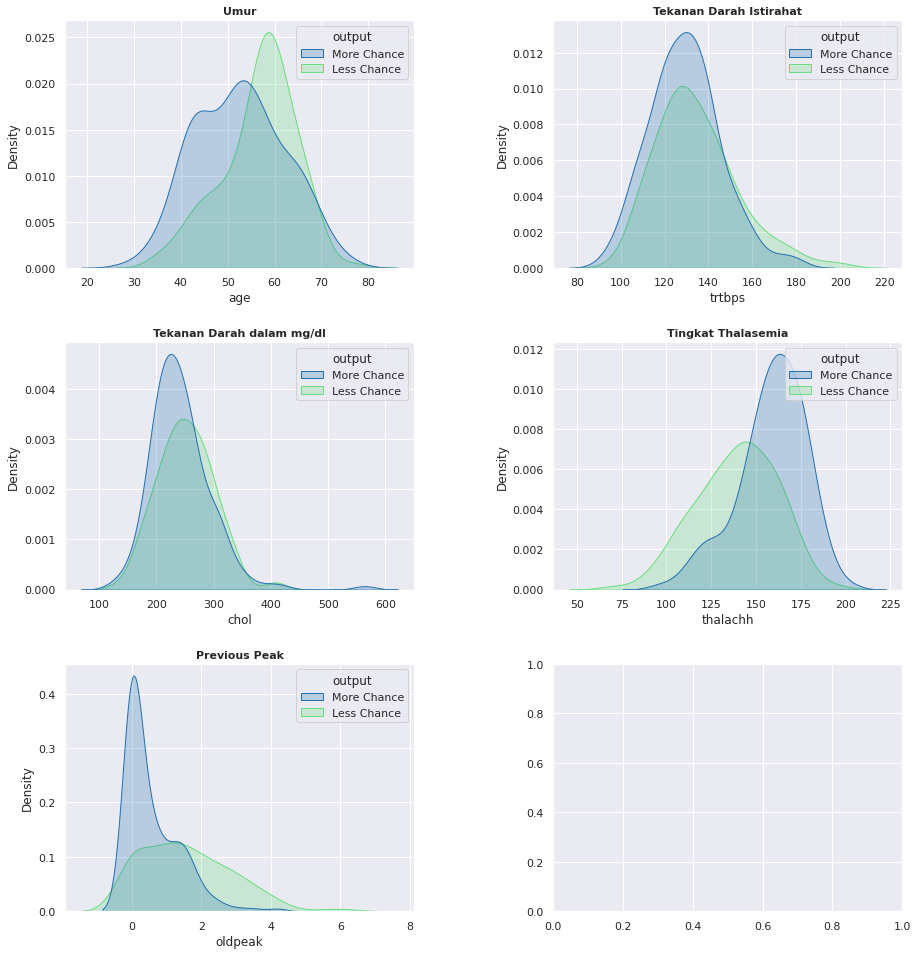

In [ ]:
def graph_num(name, u, title):
    sns.kdeplot(x=desc_df[name],hue=desc_df['output'], ax=u, shade=True, palette=['#2271b1','#68de7c'])
    u.set_title(title, fontsize=11, fontdict={"fontweight": "bold"})
    

fig2, ax2 = plt.subplots(3,2, figsize=(15, 15), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph_num("age", ax2[0,0], 'Umur')
graph_num("trtbps", ax2[0,1], 'Tekanan Darah Istirahat')
graph_num("chol", ax2[1,0], 'Tekanan Darah dalam mg/dl')
graph_num("thalachh", ax2[1,1], 'Tingkat Thalasemia')
graph_num('oldpeak', ax2[2,0], 'Previous Peak')


plt.rcParams['axes.axisbelow'] = True

Semakin besar beda antara dua kurva, maka semakin penting fitur tersebut. Fitur signifikan yang mempengaruhi apakah individu mungkin mengalami serangan jantung adalah oldpeak, thalrate, dan age. Jumlah kolesterol yang diambil melalui sensor BMI dan tekanan darah istirahat tidak berhubungan dengan kemungkinan terkena serangan jantung.

## Data Preprocessing

Bagi data menjadi feature dan label.

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


Bagi data ke dalam data train dan test. Data dibagi dengan proporsi 8:2, sehingga didapatkan jumlah data train sebanyak 242 dan data test sebanyak 61.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [ ]:
# Hasil preproses data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

StandardScaler akan melakukan standardisasi, dimana data yang dimiliki akan diubah sehingga memiliki rata rata = 0 (terpusat) dan standar deviasi = 1.


$$ z = {x-u \over s} $$

Standarisasi sangat membantu ketika data tidak terdistribusi normal.  Penggunaan standarisasi memang untuk membuat kisaran nilai menjadi ‘standar’ dengan standar deviasi dan rata rata dari data mula yang dimiliki.

## Modelling

In [ ]:
from math import sqrt
from collections import Counter

# Implementasi Algoritma KNN dengan Python
class KNN:
  def __init__(self):
    self.sklearn_model = None

  # Hitung jarak euclidian antara dua vektor
  def euclidean_distance(self, row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
      distance += (row1[i] - row2[i])**2
    return sqrt(distance)
  
  # Tentukan tetangga yang paling mirip berdasarkan jarak euclid terkecil
  def get_neighbors(self, train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
      dist = self.euclidean_distance(test_row, train_row)
      distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])

    neighbors = list()
    for i in range(num_neighbors):
      neighbors.append(distances[i][0])
    return neighbors
  
  # Buat prediksi berdasarkan nilai tetangga
  def predict_classification(self, train, test_row, num_neighbors):
    neighbors = self.get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    output_values_mode = Counter(output_values)
    output_values_mode = sorted(output_values_mode, key=output_values_mode.get, 
                                reverse=True)                                     # urutkan dari yang paling sering muncul
    prediction = output_values_mode[0]
    return prediction

  # Train using sklearn
  def sklearn_fit(self, X_train, y_train, n=5):
    self.sklearn_model = KNeighborsClassifier(n_neighbors=n) # default n neighbor = 5
    self.sklearn_model.fit(X_train,y_train)

  # Predict using sklearn model
  def sklearn_predict(self, X_test):
    result = self.sklearn_model.predict(X_test)
    return result

  # Evaluate model
  def evaluate(self, y_true, y_pred):
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    return pd.DataFrame({"Accuracy":[acc],"Precision":[prec],"Recall":[rec]})


In [ ]:
# Penggunaan kode
model = KNN()

# definisikan parameter model
num_neighbors = 5

"""
Training menggunakan KNN Sklearn
"""
model.sklearn_fit(X_train,y_train,n=num_neighbors)

"""
Training menggunakan KNN scratch Python
"""

# definisikan record data baru yang akan diprediksi
# row = [51.0, 0.0, 2.0, 130.0, 256.0, 0.0, 0.0, 149.0, 0.0, 0.5, 2.0, 0.0, 2.0] # output = 1
row = [ 0.5110413 ,  0.68100522, -0.93851463,  1.84910094, -1.3578862 ,
        2.394438  , -1.00583187, -2.60838751, -0.69663055, -0.03416616,
       -0.64911323,  1.24459328, -2.14887271] # output = 0

# predict the label
dataset = np.hstack((X_train,np.expand_dims(y_train,1)))

label = model.predict_classification(dataset, row, num_neighbors)
label

0.0

## Evaluation

In [ ]:
# Gunakan method evaluate di dalam kelas KNN untuk mengevaluasi model yang telah dibuat
"""
Evaluasi model sklearn
"""
y_pred_sklearn = model.sklearn_predict(X_test)
model.evaluate(y_test, y_pred_sklearn)

,Accuracy,Precision,Recall
0,0.918033,0.935484,0.90625


In [ ]:
"""
Evaluasi model KNN from scratch python
"""
y_pred_python = []
for row in X_test:
    res = model.predict_classification(dataset, row, num_neighbors)
    y_pred_python.append(res)

model.evaluate(y_test, y_pred_python)

,Accuracy,Precision,Recall
0,0.852459,0.896552,0.8125


Dari keluaran di atas, algoritma yang dibuat secara manual menggunakan Python menghasilkan nilai yang sama dengan library Sklearn, untuk `n=5`.

Confusion Matrixnya

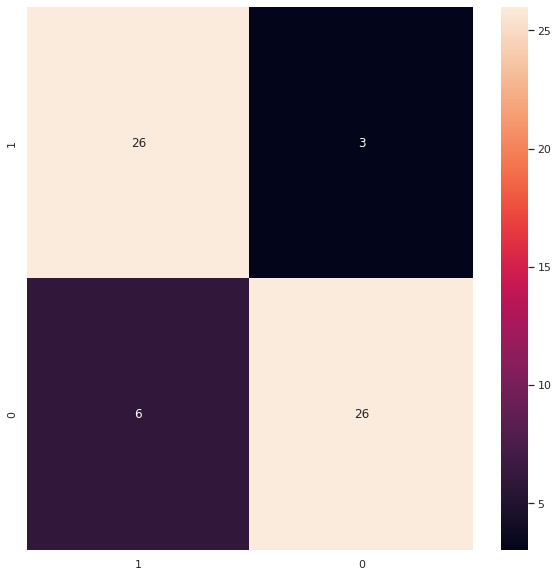

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_python)

df_cm = pd.DataFrame(confusion_mat, index = y.unique(), columns = y.unique())
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [ ]:
classification_rep = classification_report(y_test, np.array(y_pred_python).round(), target_names=['1','0'])
print('Classification Report')
print(classification_rep)

Classification Report
              precision    recall  f1-score   support

           1       0.81      0.90      0.85        29
           0       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Nilai n-neigbor merupakan hyperparameter yang bisa diubah-ubah. Pengujian dilakukan untuk nilai `n = 1, 5, 9, 13, dan 15`

In [ ]:
neighbor = [n for n in range(1,16)]
acc_list = []
prec_list = []
rec_list = []
f1_list = []

for n in neighbor:
  y_pred_python = []
  for row in X_test:
    res = model.predict_classification(dataset, row, n)
    y_pred_python.append(res)

  acc = accuracy_score(y_test, y_pred_python)
  prec = precision_score(y_test, y_pred_python)
  rec = recall_score(y_test, y_pred_python)
  f1 = f1_score(y_test, y_pred_python)

  acc_list.append(acc)
  prec_list.append(prec)
  rec_list.append(rec)
  f1_list.append(f1)

pd.DataFrame({"K":neighbor, "Accuracy":acc_list,"Precision":prec_list,"Recall":rec_list,"f1 Score":f1_list}).set_index('K')

,Accuracy,Precision,Recall,f1 Score
K,,,,
1,0.819672,0.888889,0.75000,0.813559
2,0.819672,0.888889,0.75000,0.813559
3,0.852459,0.896552,0.81250,0.852459
4,0.852459,0.896552,0.81250,0.852459
5,0.852459,0.896552,0.81250,0.852459
6,0.868852,0.928571,0.81250,0.866667
7,0.819672,0.888889,0.75000,0.813559
8,0.836066,0.892857,0.78125,0.833333
9,0.819672,0.862069,0.78125,0.819672


Dari pencarian di atas, di dapatkan nilai n terbaik ialah `15`, dengan akurasi 0.885246, presisi	0.903226, recall	0.87500, dan f-1 score	0.888889

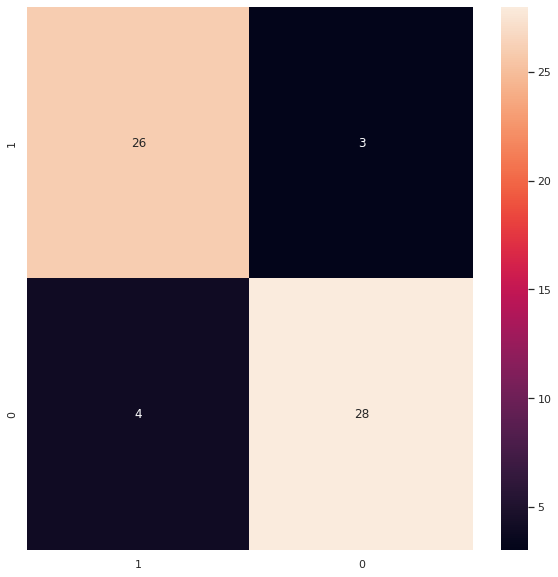

In [ ]:
"""
Evaluasi model KNN from scratch python, dengan n = 15
"""
y_pred_python = []
for row in X_test:
    res = model.predict_classification(dataset, row, 15)
    y_pred_python.append(res)

confusion_mat = confusion_matrix(y_test, y_pred_python)

df_cm = pd.DataFrame(confusion_mat, index = y.unique(), columns = y.unique())
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [ ]:
classification_rep = classification_report(y_test, np.array(y_pred_python).round(), target_names=['1','0'])
print('Classification Report')
print(classification_rep)

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.90      0.88        29
           0       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61




## Prediksi

In [ ]:
data_index = 297
sample = df.drop('output', axis=1).iloc[data_index].tolist()
sample_standardize = scaled_X[data_index]
sample_label = df['output'].iloc[data_index]

print("Data Uji Asli: ", sample)
print("Data Uji Terstandardisasi: ", sample_standardize)
print("Output Diharapkan: ", sample_label)

sklearn_pred_res = model.sklearn_predict([sample_standardize])
print("Output Model Sklearn: ", sklearn_pred_res[0])

python_pred_res = model.predict_classification(dataset, sample_standardize, num_neighbors)
print("Output Model Scratch: ", python_pred_res)

Data Uji Asli:  [59.0, 1.0, 0.0, 164.0, 176.0, 1.0, 0.0, 90.0, 0.0, 1.0, 1.0, 2.0, 1.0]
Data Uji Terstandardisasi:  [ 0.5110413   0.68100522 -0.93851463  1.84910094 -1.3578862   2.394438
 -1.00583187 -2.60838751 -0.69663055 -0.03416616 -0.64911323  1.24459328
 -2.14887271]
Output Diharapkan:  0
Output Model Sklearn:  0
Output Model Scratch:  0.0
